In [1]:
# pip install pandas-datareader

In [2]:
import pandas_datareader.data as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas_datareader.data as web

start_date = datetime(2006, 1, 1)
end_date = datetime(2016, 1, 1)

#Bank of America
bac = web.DataReader('BAC', 'stooq', start_date, end_date)

In [5]:
# end = datetime()

In [6]:
start_date = datetime(2017, 2, 27)
end_date = datetime(2024, 8, 14)
# pdr.DataReader('TSLA', start_date, end_date)

In [7]:
# Fetch TSLA stock data using yfinance
df = yf.download('TSLA', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [8]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000
...,...,...,...,...,...,...
2024-08-07,200.770004,203.490005,191.479996,191.759995,191.759995,71159800
2024-08-08,195.699997,200.699997,192.039993,198.839996,198.839996,65033900
2024-08-09,197.050003,200.880005,195.110001,200.000000,200.000000,58648300


In [9]:
type(df)

pandas.core.frame.DataFrame

<Axes: xlabel='Date'>

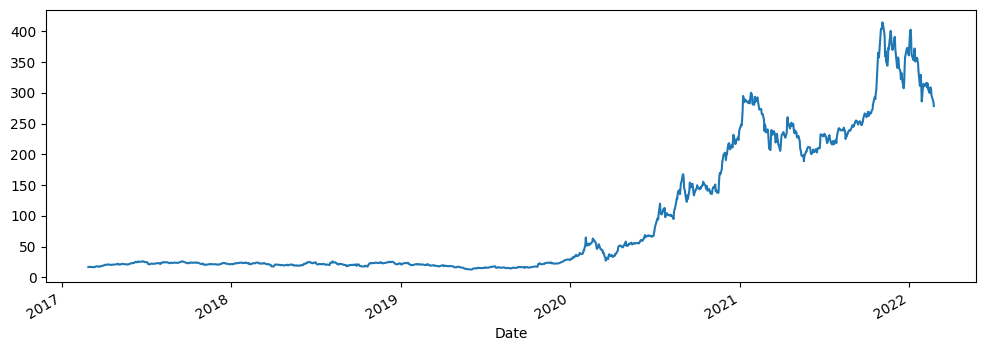

In [10]:
df[df.index < datetime(2022, 2, 24)]['High'].plot(figsize=(12, 4))

<Axes: xlabel='Date'>

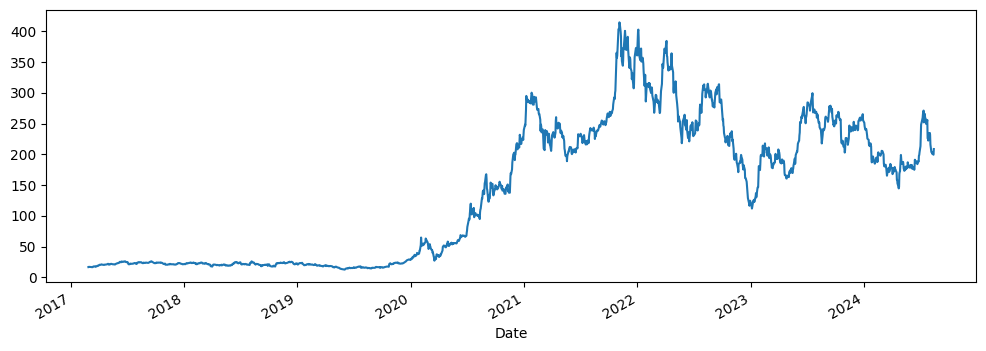

In [11]:
df['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

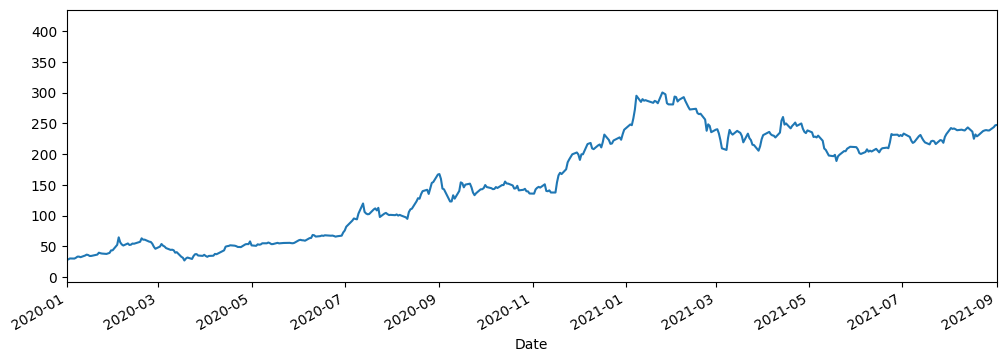

In [12]:
## xlimit and ylimit

df[df.index < datetime(2022, 2, 24)]['High'].plot(xlim=['2020-01-01', '2021-09-01'], figsize=(12, 4))

<Axes: xlabel='Date'>

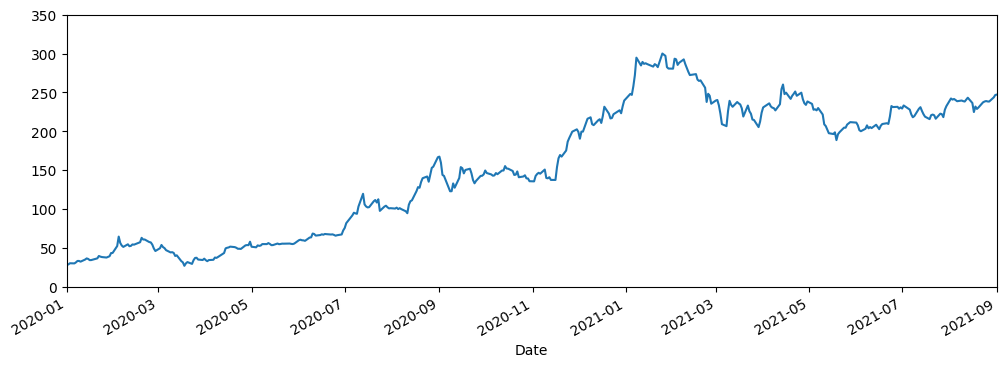

In [13]:
## xlimit and ylimit

df[df.index < datetime(2022, 2, 24)]['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 350], figsize=(12, 4))

<Axes: xlabel='Date'>

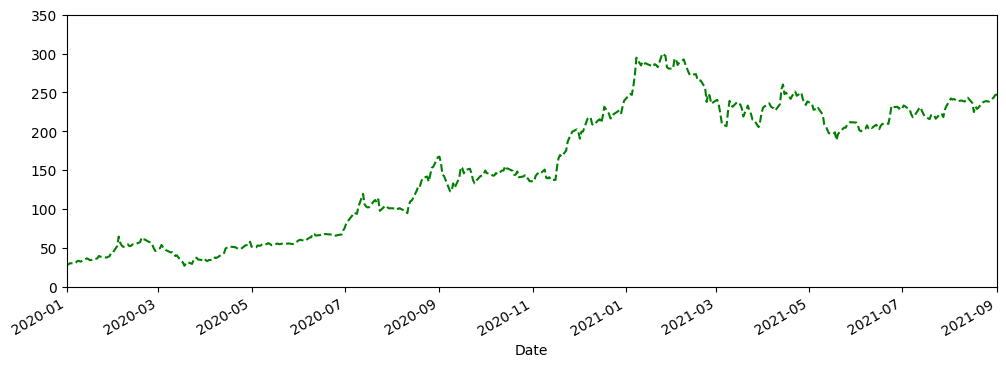

In [14]:
## xlimit and ylimit and coloring and line spaces

df[df.index < datetime(2022, 2, 24)]['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 350], figsize=(12, 4), ls='--', color='g')

In [15]:
index = df.loc['2020-01-01':'2021-09-01'].index

In [16]:
share_price = df.loc['2020-01-01':'2021-09-01']['Open']

In [17]:
share_price

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [26]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

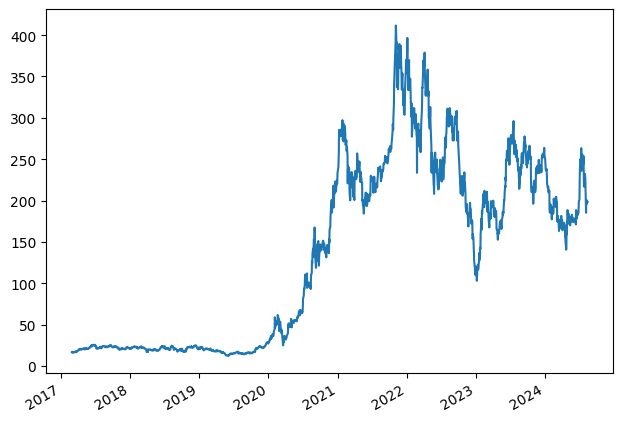

In [30]:
figure, axis = plt.subplots()
plt.tight_layout()

figure.autofmt_xdate()
axis.plot(df.index, df['Open'])

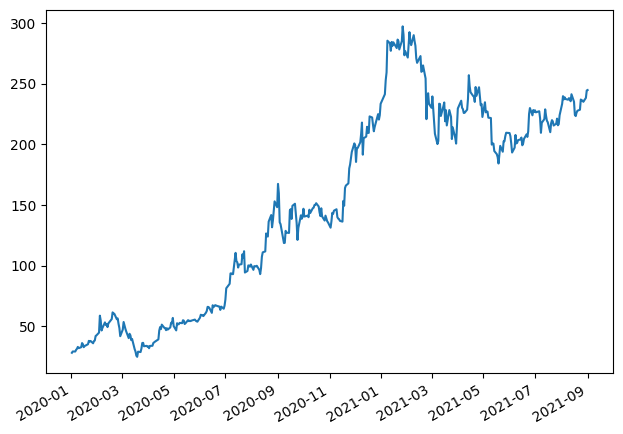

In [31]:
figure, axis = plt.subplots()
plt.tight_layout()

## To Prevent overlapping
figure.autofmt_xdate()
axis.plot(index, share_price)

In [32]:
### Datetime index

df = df.reset_index()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1878 non-null   datetime64[ns]
 1   Open       1878 non-null   float64       
 2   High       1878 non-null   float64       
 3   Low        1878 non-null   float64       
 4   Close      1878 non-null   float64       
 5   Adj Close  1878 non-null   float64       
 6   Volume     1878 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 102.8 KB


In [34]:
## If the Date column in object datatype. 
### Should conert into datetime format.
pd.to_datetime(df['Date'])

0      2017-02-27
1      2017-02-28
2      2017-03-01
3      2017-03-02
4      2017-03-03
          ...    
1873   2024-08-07
1874   2024-08-08
1875   2024-08-09
1876   2024-08-12
1877   2024-08-13
Name: Date, Length: 1878, dtype: datetime64[ns]

In [35]:
## If we want to make the date column as an index.

df = df.set_index('Date', drop=True)

In [36]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000
...,...,...,...,...,...,...
2024-08-07,200.770004,203.490005,191.479996,191.759995,191.759995,71159800
2024-08-08,195.699997,200.699997,192.039993,198.839996,198.839996,65033900
2024-08-09,197.050003,200.880005,195.110001,200.000000,200.000000,58648300


## Datetime

In [37]:
from datetime import datetime

In [38]:
datetime(2024, 8, 14)

datetime.datetime(2024, 8, 14, 0, 0)

In [39]:
datetime.now()

datetime.datetime(2024, 8, 22, 10, 44, 35, 948890)

In [40]:
date = datetime(2024, 8, 14)

In [41]:
date.date()

datetime.date(2024, 8, 14)

In [42]:
date.day

14

In [43]:
date.weekday()

2

In [44]:
date.year

2024

In [45]:
date.month

8

## Time resampling

In [46]:
df.resample(rule='A')     ## 'A' - Year end frequency

In [47]:
df.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,16.279333,16.433332,16.134001,16.246000,16.246000,43791000
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500
2019-12-31,12.073333,12.445333,11.799333,11.931333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,187.666672,29401800
2022-12-31,110.349998,116.269997,108.239998,109.099998,109.099998,41864700
2023-12-31,103.000000,111.750000,101.809998,108.099998,108.099998,65125200
2024-12-31,140.559998,144.440002,138.800003,142.050003,142.050003,50869700


In [48]:
df.resample(rule='A').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,21.691016,21.972564,21.362854,21.679966,21.679966,9.724421e+07
2018-12-31,21.145564,21.579575,20.703487,21.153995,21.153995,1.291816e+08
2019-12-31,18.201876,18.509987,17.907503,18.235347,18.235347,1.373838e+08
2020-12-31,96.369476,99.096137,93.565979,96.665689,96.665689,2.259239e+08
2021-12-31,259.946429,265.243941,254.236045,259.998162,259.998162,8.217489e+07
2022-12-31,264.135232,270.567716,256.507357,263.093081,263.093081,8.693633e+07
2023-12-31,217.075040,221.631680,212.674320,217.475240,217.475240,1.373222e+08
2024-12-31,193.776968,197.853161,189.836773,193.819161,193.819161,9.960283e+07


In [49]:
df.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,221923300
2023-12-31,296.040009,299.290009,289.519989,293.339996,293.339996,306590600
2024-12-31,263.299988,271.000000,257.859985,263.260010,263.260010,243869700


<Axes: xlabel='Date'>

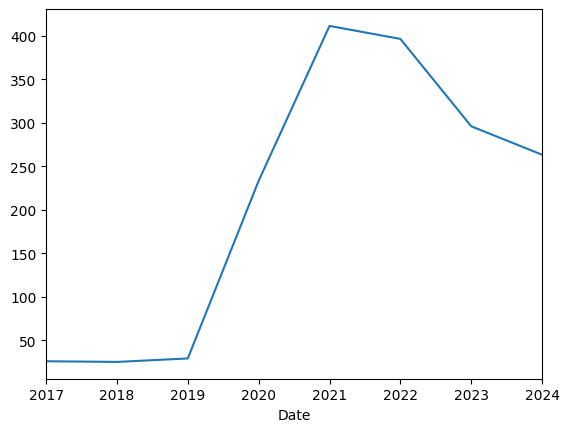

In [50]:
df.resample(rule='A').max()['Open'].plot()

In [54]:
## Quarter Start Frequency
df.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,18.582001,18.799999,18.480667,18.553333,18.553333,171912000
2017-04-01,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-01,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-01,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-01,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-01,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


<Axes: xlabel='Date'>

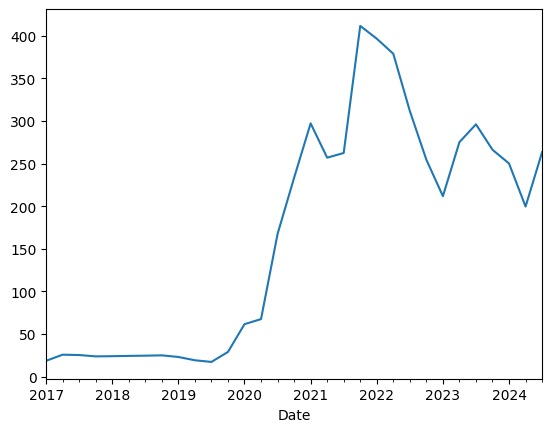

In [55]:
## Quarter Start Frequency
df.resample(rule='QS').max()['Open'].plot()

In [65]:
df.resample(rule='Q').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,17.122133,17.348720,16.945253,17.156853,17.156853,7.474452e+07
2017-06-30,21.996614,22.286762,21.668339,22.012296,22.012296,1.073686e+08
2017-09-30,23.136529,23.429175,22.733534,23.072349,23.072349,1.024034e+08
2017-12-31,21.752953,22.036614,21.439704,21.750137,21.750137,9.088910e+07
2018-03-31,22.000721,22.402437,21.598306,21.995268,21.995268,9.608115e+07
2018-06-30,20.265146,20.713167,19.909771,20.322490,20.322490,1.310892e+08
2018-09-30,20.811799,21.240011,20.348212,20.827735,20.827735,1.537533e+08
2018-12-31,21.545714,22.002561,20.998667,21.510392,21.510392,1.347217e+08
2019-03-31,20.047585,20.387289,19.684841,20.074448,20.074448,1.273760e+08


In [66]:
## Business End Frequency
df.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-30,396.516663,402.666656,378.679993,399.926666,399.926666,221923300
2023-12-29,296.040009,299.290009,289.519989,293.339996,293.339996,306590600
2024-12-31,263.299988,271.000000,257.859985,263.260010,263.260010,243869700


<Axes: xlabel='Date'>

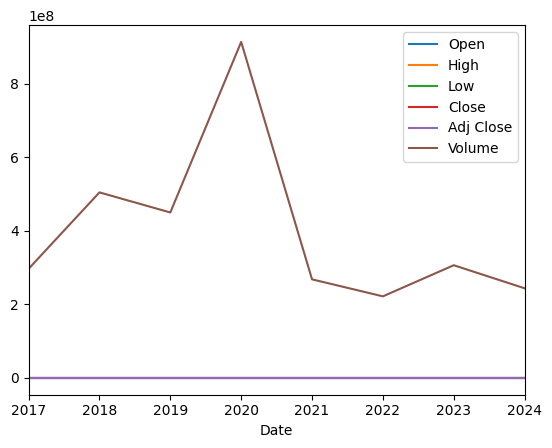

In [58]:
df.resample(rule='BA').max().plot()

In [59]:
## Business Quarter Start Frequeny
df.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.582001,18.799999,18.480667,18.553333,18.553333,171912000
2017-04-03,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-03,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-02,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-02,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-02,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


<Axes: xlabel='Date'>

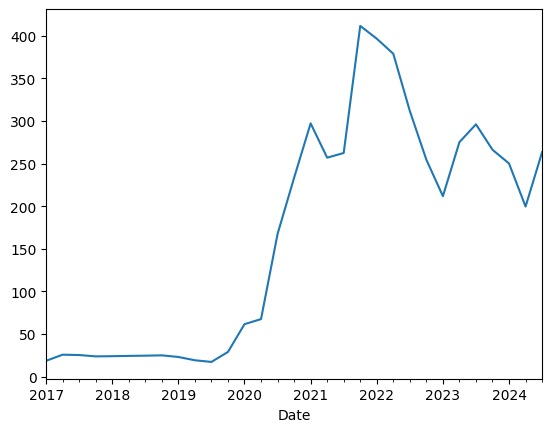

In [60]:
df.resample(rule='BQS').max()['Open'].plot()

<Axes: xlabel='Date'>

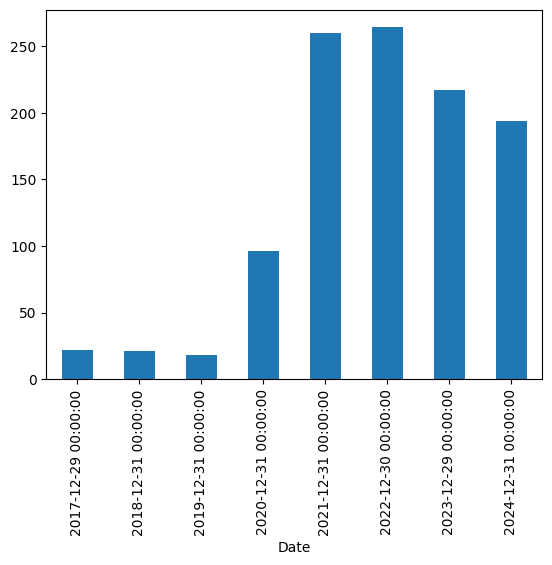

In [61]:
df['Open'].resample(rule='BA').mean().plot(kind='bar')

<Axes: xlabel='Date'>

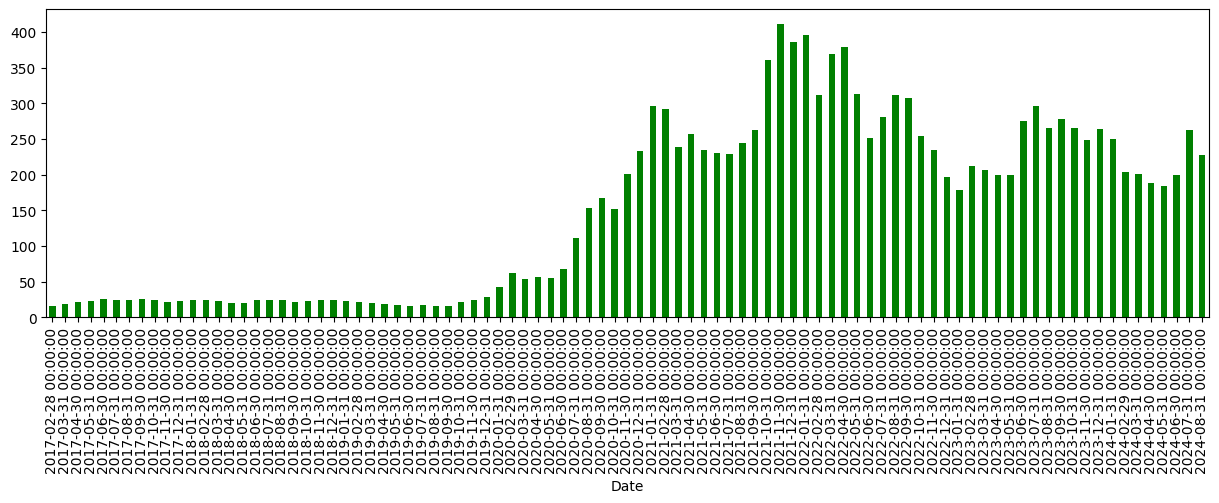

In [62]:
df['Open'].resample(rule='M').max().plot(kind='bar', figsize=(15,4), color='g')

In [67]:
df['High'].rolling(10).mean().head(20)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10    16.734733
2017-03-13    16.724667
2017-03-14    16.772133
2017-03-15    16.813133
2017-03-16    16.896267
2017-03-17    16.985800
2017-03-20    17.071467
2017-03-21    17.144200
2017-03-22    17.177534
2017-03-23    17.237600
2017-03-24    17.353534
Name: High, dtype: float64

In [68]:
df['High']

Date
2017-02-27     16.557333
2017-02-28     16.733334
2017-03-01     16.990000
2017-03-02     16.885332
2017-03-03     16.793333
                 ...    
2024-08-07    203.490005
2024-08-08    200.699997
2024-08-09    200.880005
2024-08-12    199.259995
2024-08-13    208.490005
Name: High, Length: 1878, dtype: float64

In [69]:
df['Open:30 days rolling'] = df['Open'].rolling(30).mean()

In [70]:
df.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000,NaN
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500,NaN
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500,NaN
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000,NaN
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000,NaN
2017-03-06,16.527332,16.780001,16.500668,16.747334,16.747334,50332500,NaN
2017-03-07,16.794666,16.926001,16.554667,16.572666,16.572666,51892500,NaN
2017-03-08,16.466667,16.671333,16.354668,16.458000,16.458000,55878000,NaN
2017-03-09,16.508667,16.577333,16.200001,16.326668,16.326668,58189500,NaN


<Axes: xlabel='Date'>

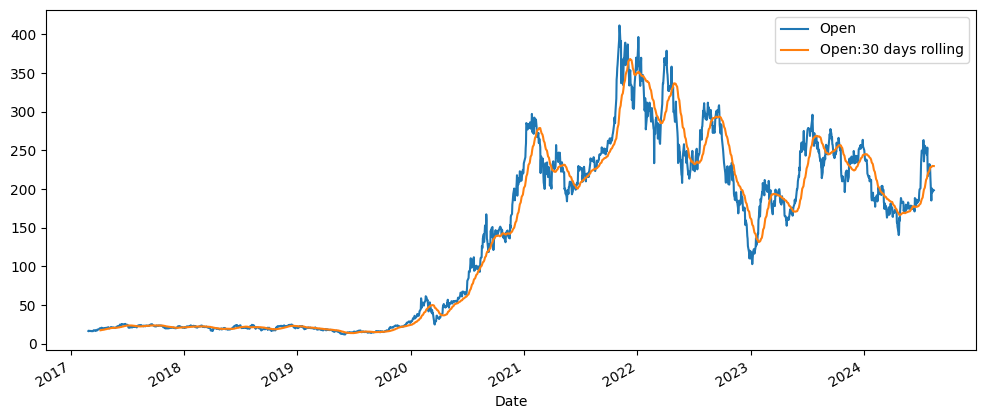

In [71]:
df[['Open', 'Open:30 days rolling']].plot(figsize=(12, 5))

## Assignment

1. Read Microsoft Data using Pandas data reader
2. Get the max price of the share from 2017 to 2024
3. Which is the date of the highest price of the stock?
4. Which is the date of the lowest price of the stock?
### To identify the Highest and lowest price of the stock, just check news.

In [80]:
df_ms = yf.download('MSFT', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [81]:
df_ms

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,64.540001,64.540001,64.050003,64.230003,58.680099,15871500
2017-02-28,64.080002,64.199997,63.759998,63.980000,58.451694,23239800
2017-03-01,64.129997,64.989998,64.019997,64.940002,59.328743,26937500
2017-03-02,64.690002,64.750000,63.880001,64.010002,58.479107,24539600
2017-03-03,63.990002,64.279999,63.619999,64.250000,58.698360,18135900
...,...,...,...,...,...,...
2024-08-07,408.640015,410.079987,397.470001,398.429993,397.713165,20650900
2024-08-08,402.440002,405.859985,399.940002,402.690002,401.965485,20203000
2024-08-09,404.029999,408.049988,402.260010,406.019989,405.289490,19276700


In [82]:
# # Microsoft Share prices
# df_ms = pdr.DataReader('MSFT', 'stooq', start_date, end_date)

In [83]:
df_ms

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,64.540001,64.540001,64.050003,64.230003,58.680099,15871500
2017-02-28,64.080002,64.199997,63.759998,63.980000,58.451694,23239800
2017-03-01,64.129997,64.989998,64.019997,64.940002,59.328743,26937500
2017-03-02,64.690002,64.750000,63.880001,64.010002,58.479107,24539600
2017-03-03,63.990002,64.279999,63.619999,64.250000,58.698360,18135900
...,...,...,...,...,...,...
2024-08-07,408.640015,410.079987,397.470001,398.429993,397.713165,20650900
2024-08-08,402.440002,405.859985,399.940002,402.690002,401.965485,20203000
2024-08-09,404.029999,408.049988,402.260010,406.019989,405.289490,19276700


In [84]:
### The max price of the share from 2017 to 2024

df_ms.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,87.120003,87.500000,86.230003,86.849998,80.628456,71066700
2018-12-31,115.419998,116.180000,114.930000,115.610001,108.716530,111242100
2019-12-31,159.449997,159.550003,158.220001,158.960007,152.347275,55636400
2020-12-31,229.270004,232.860001,227.350006,231.649994,223.779434,97012700
2021-12-31,344.619995,349.670013,342.200012,343.109985,335.105804,69870600
2022-12-31,335.350006,338.000000,329.779999,334.750000,326.940857,90428900
2023-12-31,383.760010,384.299988,378.160004,382.700012,380.619812,78478200
2024-12-31,467.000000,468.350006,464.459991,467.559998,466.718781,47995300


<Axes: xlabel='Date'>

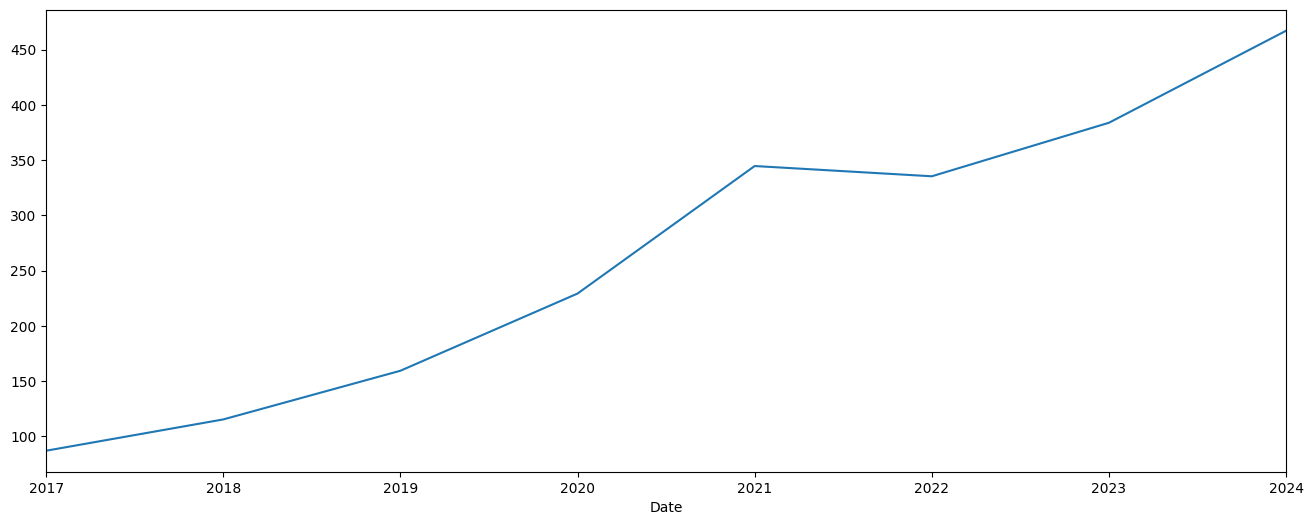

In [87]:
df_ms.resample(rule='A').max()['Open'].plot(figsize=(16,6))

In [88]:
df_ms['Open: 10 days rolling'] = df_ms['Open'].rolling(10).max()

<Axes: xlabel='Date'>

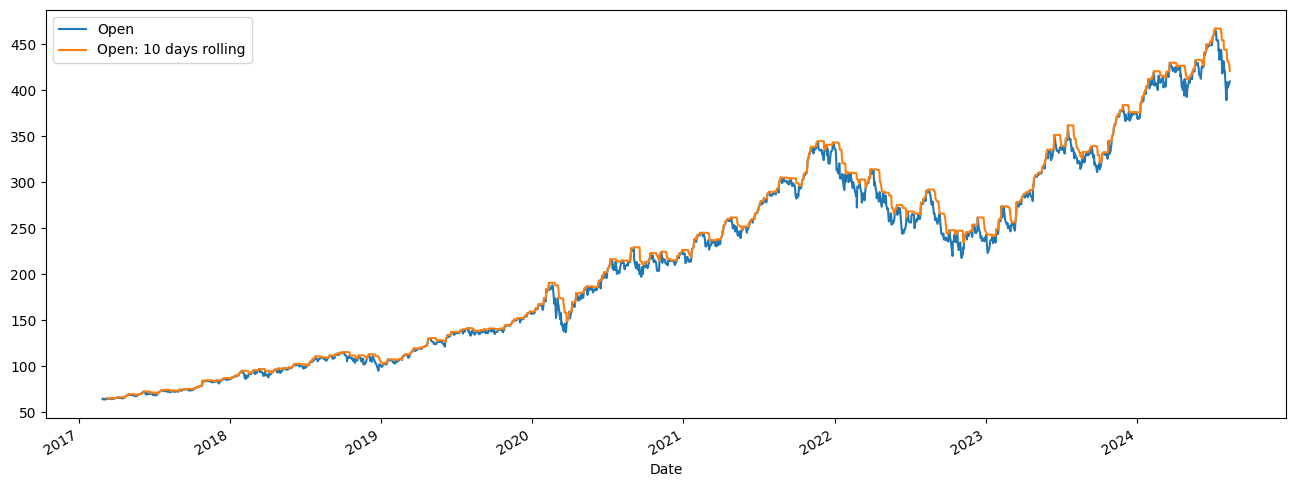

In [92]:
df_ms[['Open', 'Open: 10 days rolling']].plot(figsize=(16,6))

In [98]:
### Which is the date of the highest price of the stock?

df_ms[df_ms['Close']==df_ms['Close'].max()]

,Open,High,Low,Close,Adj Close,Volume,Open: 10 days rolling
Date,,,,,,,
2024-07-05,459.609985,468.350006,458.970001,467.559998,466.718781,16000300,459.609985


In [99]:
df_ms[df_ms['Close']==df_ms['Close'].max()].index

DatetimeIndex(['2024-07-05'], dtype='datetime64[ns]', name='Date', freq=None)

In [100]:
### Which is the date of the lowest price of the stock?

df_ms[df_ms['Close']==df_ms['Close'].min()]

,Open,High,Low,Close,Adj Close,Volume,Open: 10 days rolling
Date,,,,,,,
2017-02-28,64.080002,64.199997,63.759998,63.98,58.451694,23239800,NaN
